In [4]:
from pathlib import Path
import numpy as np
import torch

%matplotlib inline

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# base_folder = Path("/home/smehta/Projects/Matcha-TTS/temp_duration_plots")

# base_folder = Path("/home/smehta/Projects/BetterFastSpeech2/Interspeech2024/temp_duration_plots")

base_folder = Path("/home/smehta/Projects/vits/Interspeech2024/temp_duration_plots")

In [52]:
def quantisation_residue(x):
    if isinstance(x, np.ndarray):
        x = torch.from_numpy(x)
    return torch.sum(torch.abs(x - torch.round(x).int())).item(), x.squeeze().shape[0]

def quantisation_residue_list(x, return_type="avg"):
    lens, sum_list = [], []
    for y in x:
        # print(y)
        s_, l_ = quantisation_residue(y)
        lens.append(l_)
        sum_list.append(s_)
    if return_type == "sum":
        return sum(sum_list)
    elif return_type == "avg":
        return sum(sum_list) / sum(lens)
    else:
        return sum_list

In [53]:


values = {}
for file in base_folder.glob('*.pt'):
    if file.is_file():
        values[file.stem] = quantisation_residue_list(torch.load(file))

In [54]:
values

{'det_TSGD2': 0.26725764402812024,
 'TSGD2_1': 0.26961695369471356,
 'ConvS_0': 0.22011444078871176,
 'TSGD2_10': 0.07527247693260868,
 'ConvS_1': 0.2940427192839865,
 'ConvS_500': 0.030992336992185433,
 'RS_1': 0.29912594854728586,
 'TSGD2_100': 0.0522290655195942,
 'RS_25': 0.03420288299820403,
 'TSGD2_500': 0.052225789095772364,
 'RS_10': 0.0684083941458226,
 'LJ_0': 0.21974213274858043,
 'ConvS_50': 0.03238372994095327,
 'LJ_10': 0.1127327575159949,
 'RS_500': 0.022058651071791235,
 'ConvS_25': 0.03829266420111521,
 'det_ConvS': 0.2967174760268331,
 'RS_4': 0.23978087916092097,
 'LJ_1': 0.2529055635694047,
 'RS_2': 0.28703231116422334,
 'ConvS_100': 0.0317067803290374,
 'ConvS_4': 0.20057303248094027,
 'LJ_500': 0.05678118215309864,
 'LJ_25': 0.07522992896174586,
 'TSGD2_25': 0.05737675312386585,
 'det_LJ': 0.2565131748925202,
 'RS_100': 0.02359770668083164,
 'TSGD2_2': 0.24935297359526792,
 'TSGD2_4': 0.1935606684585031,
 'LJ_50': 0.0621701185515945,
 'LJ_4': 0.24070525733586112,


In [55]:
TSGD2 = [v for _, v in sorted({int(k.split("_")[1]): v for k, v in values.items() if "TSGD2_" in k}.items())]
TSGD2_det = [values["det_TSGD2"] for _ in range(len(TSGD2))]
ConvS = [v for _, v in sorted({int(k.split("_")[1]): v for k, v in values.items() if "ConvS_" in k}.items())]
ConvS_det = [values["det_ConvS"] for _ in range(len(ConvS))]
RS = [v for _, v in sorted({int(k.split("_")[1]): v for k, v in values.items() if "RS_" in k}.items())]
RS_det = [values["det_RS"] for _ in range(len(RS))]
LJ = [v for _, v in sorted({int(k.split("_")[1]): v for k, v in values.items() if "LJ_" in k}.items())]
LJ_det = [values["det_LJ"] for _ in range(len(LJ))]

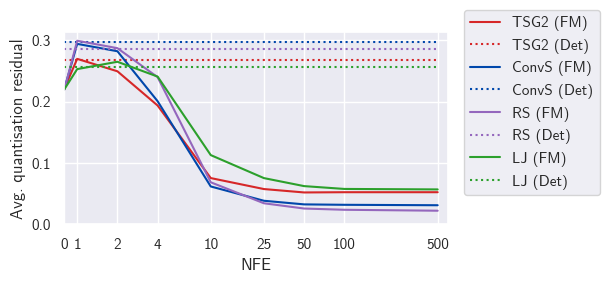

In [56]:
from whisperweranalysis.plotting.line import plot_lines
import matplotlib.pyplot as plt

x = [max(0.8, k) for k, _ in sorted({int(k.split("_")[1]): v for k, v in values.items() if "TSGD2_" in k}.items())]
y_values = [TSGD2, TSGD2_det, ConvS, ConvS_det, RS, RS_det, LJ, LJ_det]
x_ticks = list(x)
x_tick_labels = ["0"] + list(map(str, x_ticks))[1:]
y_ticks = None # [1, 2, 3, 4, 5] #, 25, 50, 100]
y_tick_labels = None # list(map(str, y_ticks))
plot_colors = ['#d62728', '#d62728', '#0047AB', '#0047AB', '#9467bd', '#9467bd', '#2ca02c', '#2ca02c', '#8b0000', '#8c564b', '#17becf'] #, '#d62728', '#0047AB', '#2ca02c', ]
line_format = ['-', ':', '-', ':', '-', ':' ,'-', ':'] # '--', '--', '--']
aspect_ratio = (2, 1)
output_filename = 'quantization.pdf'
plot_log_x = True
plot_log_y = False 
xlim = [0.8, 600] # (2, 10)
legend_labels = ["TSG2 (FM)", "TSG2 (Det)", "ConvS (FM)", "ConvS (Det)", "RS (FM)", "RS (Det)", "LJ (FM)", "LJ (Det)"]
# with plt.xkcd():
plot_lines([x, x, x, x, x, x, x, x], y_values, 
            x_label='NFE',
            y_label='Avg. quantisation residual',
            legend_label=legend_labels,
            line_format=line_format,
            plot_colors=plot_colors,
            aspect_ratio=aspect_ratio,
            x_ticks=x_ticks,
            x_tick_labels=x_tick_labels,
            y_ticks=y_ticks,
            y_tick_labels=y_tick_labels,
            file_name=output_filename,
            plot_log_x=plot_log_x,
            plot_log_y=plot_log_y,
            xlim=xlim,
    )